## Project Title

**Author:** Keziah Gicheha.

## Overview

This project aims to develop a machine learning classifier to predict customer churn for SyriaTel, a telecommunications company. The model will identify whether a customer is likely to stop doing business with the company in the near future. By analyzing customer data and identifying patterns associated with churn, the model will help SyriaTel take proactive measures to retain customers, thereby reducing revenue loss.

## Business Problem

SyriaTel, a telecommunications company, is facing the challenge of customer churn — customers leaving the service, resulting in lost revenue. Retaining customers is crucial for the company’s profitability and growth, as acquiring new customers often costs more than keeping existing ones. The company needs to identify customers who are likely to stop doing business with them so that targeted retention strategies can be implemented.

Dta Analysis Questions. 

1. What are the factors that indicate the churn of customers?
I will identify the features or behaviors that strongly corelate with customers leaving the service which will help the business to understand the root causes of the churn

2. Can it be predicted whether a customer will churn in the near future? 
By building a predictive model, the company can proactively identify at-risk customers and take action to retain them before they leave.

3. What is the expected accuracy of the churn prediction model?
Understanding the model's accuracy helps the business gauge the reliability of the predictions and determine if the model is fit for decision-making.

4. What customer segments are most at risk of churning?
Segmenting customers based on their churn risk allows for more personalized and effective retention strategies.

By understanding and predicting churn, SyriaTel can reduce revenue losses, improve customer satisfaction, and allocate resources more efficiently toward retention efforts. This proactive approach can significantly impact the company's bottom line and competitive edge in the market.


## Data Understanding(will add SOME MORE INFO)

 The data for this project has been sourced from <a href="https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset"> Kaggles Website</a> and it relates to the data analysis questions since it has the information that is needd to predict the churn of customers in the company. 
   
Questions to consider:
  
   * What do the data represent? Who is in the sample and what variables are included?
   * The target variable is the column labelled "churn" which is binary (e.g., 0 or 1, yes or no).
   * The properties of the variables that I intend to use are categorical variables, since this is a classification problem and logistic regression only deals with classes.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import necessary functions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
#Load the dataset 

st_data = pd.read_csv('Data\data.csv', index_col= False)
st_data.head(5)



state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [3]:
#Describe the data
st_data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [4]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#identify unique values 
# Check unique values for each column
for column in st_data.columns:
    unique_values = st_data[column].unique()
    num_unique_values = len(unique_values)
    print(f"Column '{column}' has {num_unique_values} unique values.")
    print(unique_values)
    print("\n")


Column 'state' has 51 unique values.
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


Column 'account length' has 212 unique values.
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 1

## Data Preparation (FOR REVIEW)
* Describe and justify the process for preparing the data for analysis

Questions to consider:
* Were there variables you dropped or created? - to drop phone numbers, cause they are unique, state, account length,
* How did you address missing values or outliers? 
* Why are these choices appropriate given the data and the business problem?




In [6]:
## Exploratory Data Analysis

# Create a new copy of the dataframe for EDA
# Perform EDA and feature engineering on st_data_eda
st_data_eda = st_data.copy()

#Data Cleaning - check for missing values 
st_data_eda.isna().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values from this dataset, all rows have values.

In [11]:

# Drop 'phone number ' and 'account length' from the EDA dataframe
st_data_eda = st_data_eda.drop(columns=['phone number', 'account length'])

# Verify the columns have been removed
print(st_data_eda.columns)


Index(['state', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')


The phone number feature and account length seem to be identifiers, hence I removed them from the dataset.

In [14]:
#check the first 5 rows with te removed features 
st_data_eda.head(5)

state  area code international plan voice mail plan  number vmail messages  \
0    KS        415                 no             yes                     25   
1    OH        415                 no             yes                     26   
2    NJ        415                 no              no                      0   
3    OH        408                yes              no                      0   
4    OK        415                yes              no                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1  False  
1               3.70                       1  False  
2               3.29                       0  False  
3               1.78                       2  False  
4               2.73                       3  False

In [13]:
# Check the unique values in each column
for column in st_data_eda.columns:
    unique_values = st_data_eda[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("\n")


Column: state
Unique values: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


Column: area code
Unique values: [415 408 510]


Column: international plan
Unique values: ['no' 'yes']


Column: voice mail plan
Unique values: ['yes' 'no']


Column: number vmail messages
Unique values: [25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 22 23 43 31 38
 40 48 18 17 45 16 20 14 19 51 15 11 12 47  8 44 49  4 10 13 50  9]


Column: total day minutes
Unique values: [265.1 161.6 243.4 ... 321.1 231.1 180.8]


Column: total day calls
Unique values: [110 123 114  71 113  98  88  79  97  84 137 127  96  70  67 139  66  90
 117  89 112 103  86  76 115  73 109  95 105 121 118  94  80 128  64 106
 102  85  82  77 120 133 135 108  57  83 129  91  92  74  93 101 146  72
  99 104 125  61 1

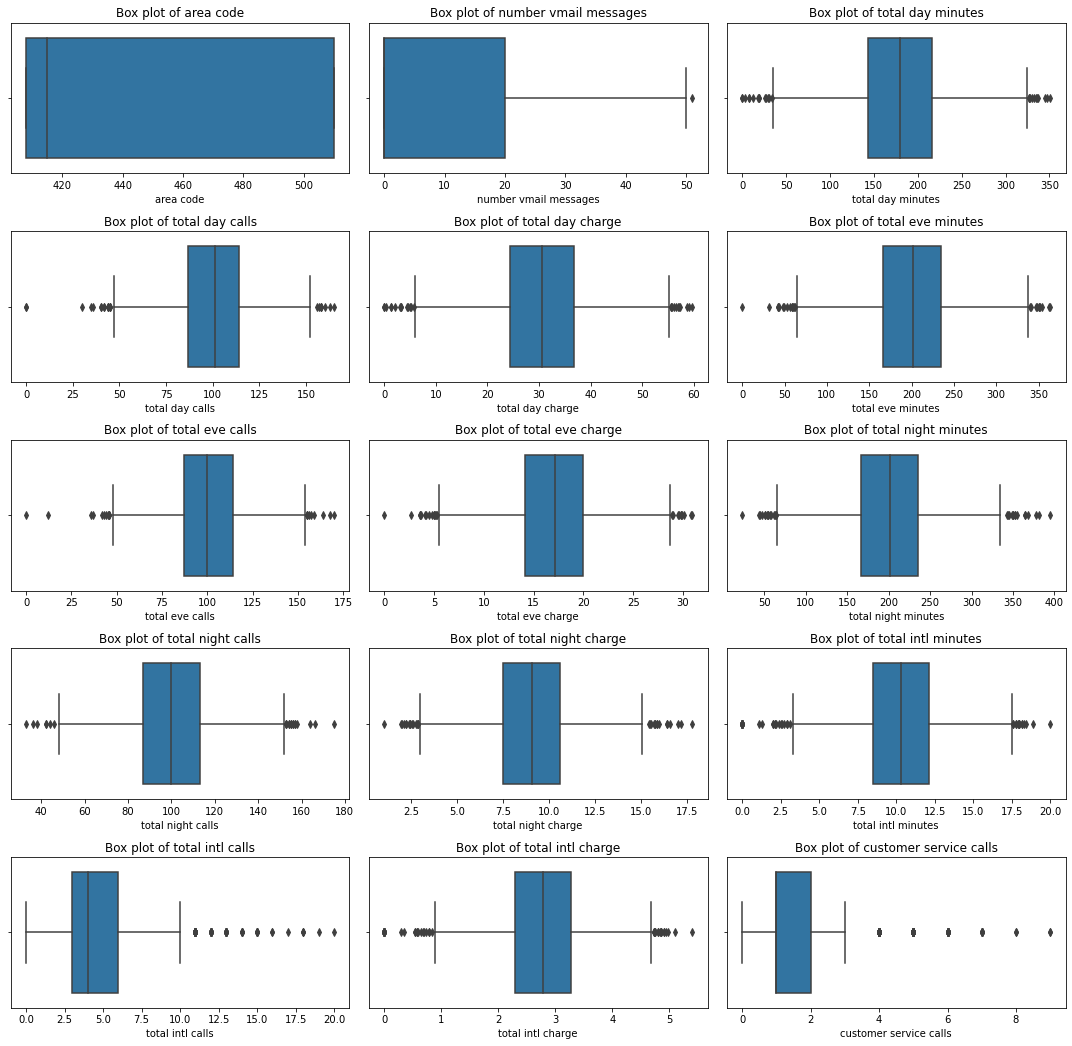

In [12]:
#check for outliers
#use box plots to check for the numerical columns in the dataset 

# Set the size of the plots
plt.figure(figsize=(15, 20))

# Loop through each numerical column and create a box plot
for i, column in enumerate(st_data_eda.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(len(st_data_eda.columns) // 3 + 1, 3, i)
    sns.boxplot(x=st_data[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

### Univariate Analysis
Analyze individual features (distribution, summary statistics).





In [15]:
# Summary statistics for numeric features
summary_stats = st_data_eda.describe()
print(summary_stats)

# Summary statistics for categorical features
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan', 'churn']
for feature in categorical_features:
    print(f"\n{feature}:\n{st_data_eda[feature].value_counts()}")


         area code  number vmail messages  total day minutes  total day calls  \
count  3333.000000            3333.000000        3333.000000      3333.000000   
mean    437.182418               8.099010         179.775098       100.435644   
std      42.371290              13.688365          54.467389        20.069084   
min     408.000000               0.000000           0.000000         0.000000   
25%     408.000000               0.000000         143.700000        87.000000   
50%     415.000000               0.000000         179.400000       101.000000   
75%     510.000000              20.000000         216.400000       114.000000   
max     510.000000              51.000000         350.800000       165.000000   

       total day charge  total eve minutes  total eve calls  total eve charge  \
count       3333.000000        3333.000000      3333.000000       3333.000000   
mean          30.562307         200.980348       100.114311         17.083540   
std            9.259435    

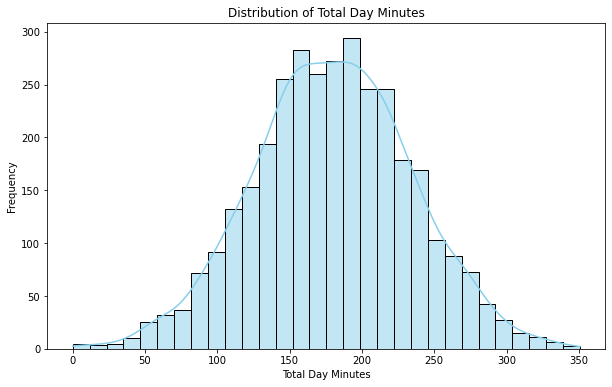

In [16]:
# Distribution of Total Day Minutes
plt.figure(figsize=(10, 6))
sns.histplot(st_data_eda['total day minutes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()


There is an observation that the "Total Day minutes" is normally distributed with the average minutes being rough about 180 minutes per day for a user.

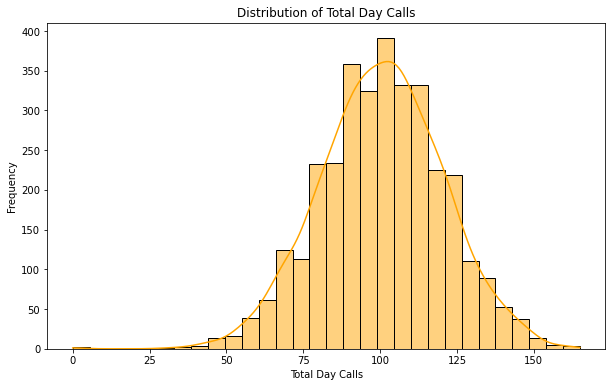

In [17]:
# Distribution of Total Day Calls
plt.figure(figsize=(10, 6))
sns.histplot(st_data_eda['total day calls'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Day Calls')
plt.xlabel('Total Day Calls')
plt.ylabel('Frequency')
plt.show()


From the histogram above, "Total day calls" has a slight left skewness.

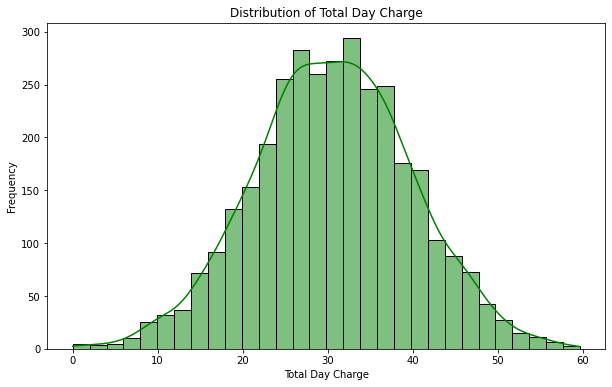

In [19]:
# Distribution of Total Day Charge
plt.figure(figsize=(10, 6))
sns.histplot(st_data_eda['total day charge'], bins=30, kde=True, color='green')
plt.title('Distribution of Total Day Charge')
plt.xlabel('Total Day Charge')
plt.ylabel('Frequency')
plt.show()


The distribution of the total day charge looks normally distributed, with the highest charge rate approximately 270. No skewness visible.

### categorical Features Analysis

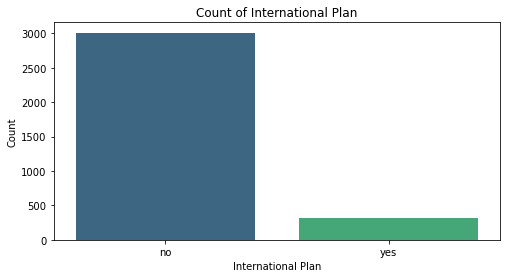

In [20]:
# Count plot for International Plan
plt.figure(figsize=(8, 4))
sns.countplot(x='international plan', data=st_data_eda, palette='viridis')
plt.title('Count of International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()


In [21]:
st_data_eda["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

From this graph, 3010 users in this dataset do not have an international plan while 323 users have an international plan.

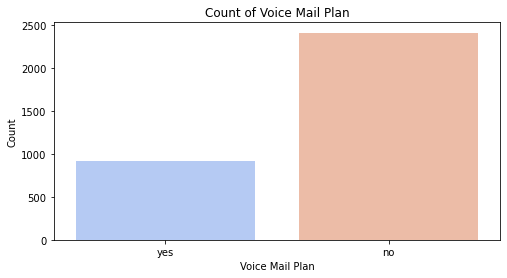

In [22]:
# Count plot for Voice Mail Plan
plt.figure(figsize=(8, 4))
sns.countplot(x='voice mail plan', data=st_data_eda, palette='coolwarm')
plt.title('Count of Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()


In [23]:
st_data_eda['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

2411 users from the dataset do not have a voice mail plan and 922 users have a voice mail plan

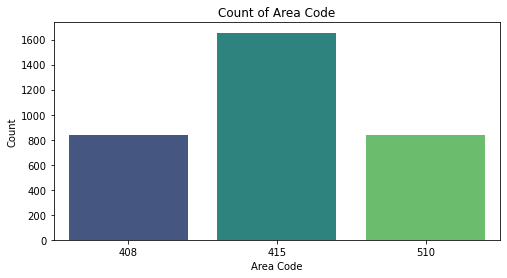

In [27]:
# Count plot for Area Code
plt.figure(figsize=(8, 4))
sns.countplot(x='area code', data=st_data_eda, palette='viridis')
plt.title('Count of Area Code')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()


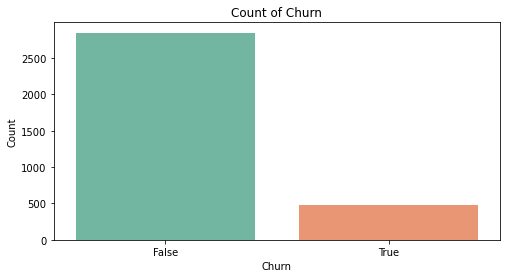

In [24]:
# Count plot for Churn
plt.figure(figsize=(8, 4))
sns.countplot(x='churn', data=st_data_eda, palette='Set2')
plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [25]:
st_data_eda['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

From the dataset, the number of customers who churned was 483 while those who did not was 2850 users.

### Bivariate Analysis
Analyze the relationship between each feature and the target variable using visualizations (e.g., box plots, bar charts) and summary statistics

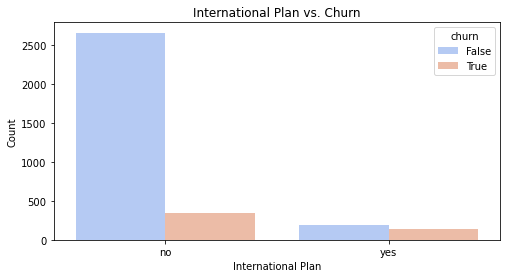

In [28]:
#International plan vs Churn
plt.figure(figsize=(8, 4))
sns.countplot(x='international plan', hue='churn', data=st_data_eda, palette='coolwarm')
plt.title('International Plan vs. Churn')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()


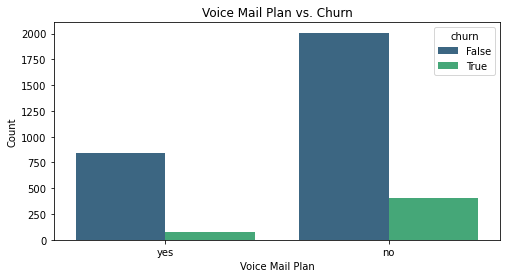

In [29]:
plt.figure(figsize=(8, 4))
sns.countplot(x='voice mail plan', hue='churn', data=st_data_eda, palette='viridis')
plt.title('Voice Mail Plan vs. Churn')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()


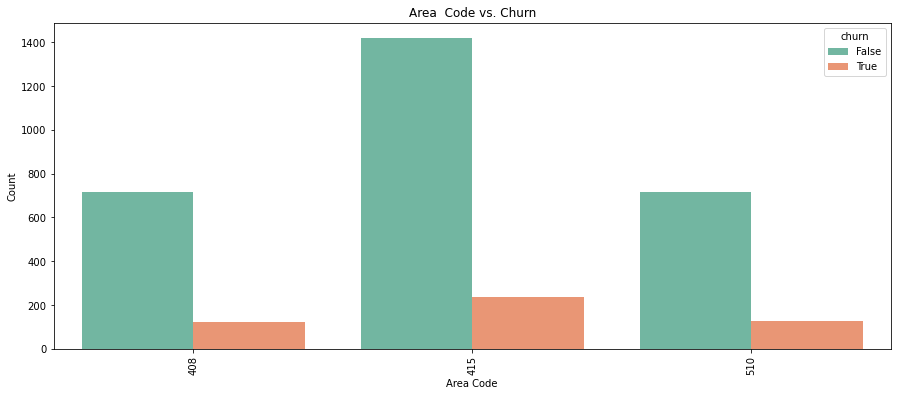

In [34]:
plt.figure(figsize=(15, 6))
sns.countplot(x='area code', hue='churn', data=st_data_eda, palette='Set2')
plt.title('Area  Code vs. Churn')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [35]:
# Grouping by churn and calculating summary statistics
grouped_stats = st_data_eda.groupby('churn').mean()
print(grouped_stats)


        area code  number vmail messages  total day minutes  total day calls  \
churn                                                                          
False  437.074737               8.604561         175.175754       100.283158   
True   437.817805               5.115942         206.914079       101.335404   

       total day charge  total eve minutes  total eve calls  total eve charge  \
churn                                                                           
False         29.780421         199.043298       100.038596         16.918909   
True          35.175921         212.410145       100.561077         18.054969   

       total night minutes  total night calls  total night charge  \
churn                                                               
False           200.133193         100.058246            9.006074   
True            205.231677         100.399586            9.235528   

       total intl minutes  total intl calls  total intl charge  \
churn      

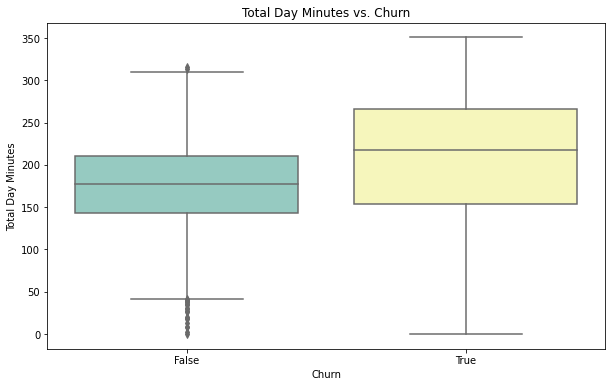

In [36]:
#bivariate Analysis for numeric features
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day minutes', data=st_data_eda, palette='Set3')
plt.title('Total Day Minutes vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()


From the obseravtions made from th box plots, those who churned used more day minutes, 220 minutes, than those who did not,170 minutes. This could indicate thet "Total Day Minutes" is a significant feature. 

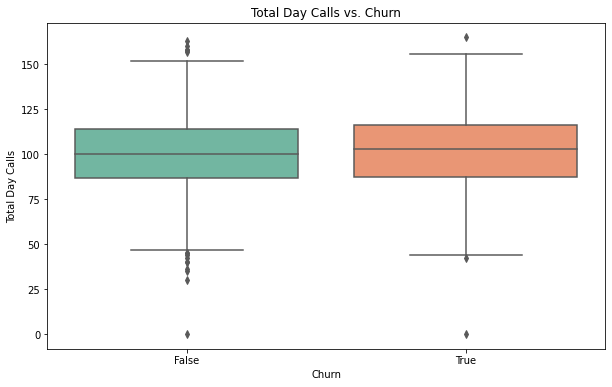

In [37]:
#Total Day Calls Vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day calls', data=st_data_eda, palette='Set2')
plt.title('Total Day Calls vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Calls')
plt.show()


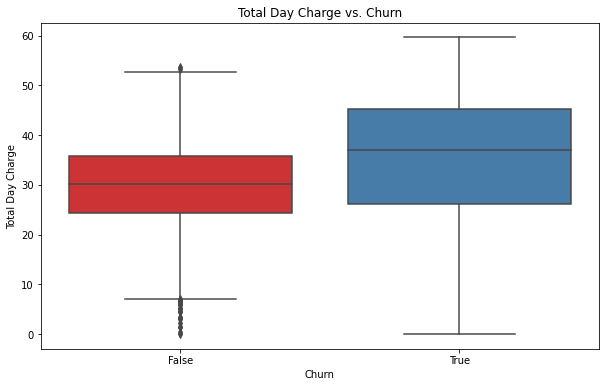

In [38]:
#Total Day Charge Vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day charge', data=st_data_eda, palette='Set1')
plt.title('Total Day Charge vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()


The above plot indicates that those who churned had a higher day charge that those who did not. This featre also indicates that it could be a signficant feature

### Multivariate Analysis
Analyze relationships between features, identify correlations, and check for multicollinearity.

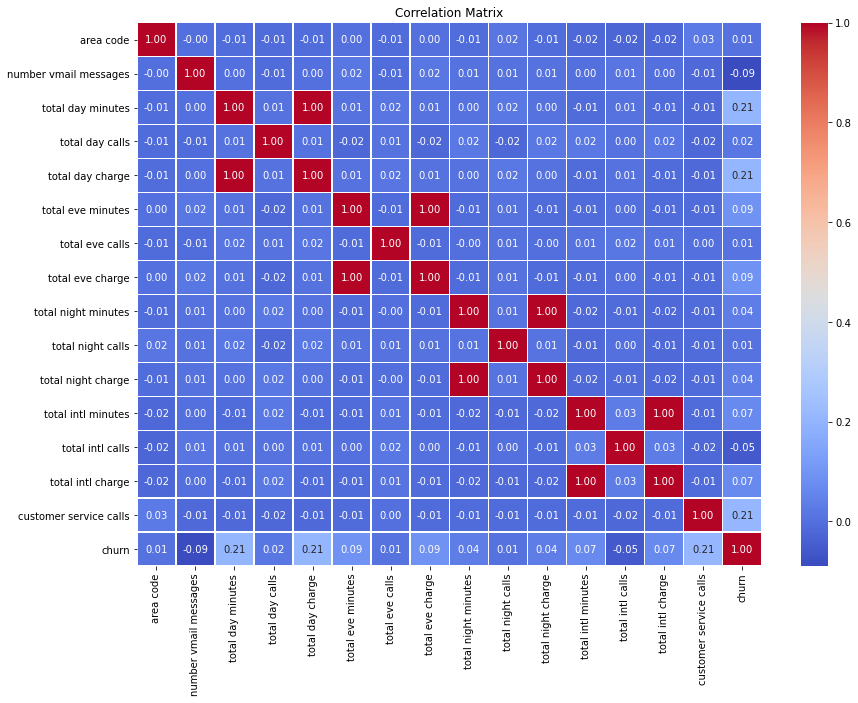

In [39]:

# Calculate the correlation matrix
correlation_matrix = st_data_eda.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [40]:
#multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Dropping the target variable
X = st_data_eda.drop(columns=['churn'])

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Adding a constant column for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF
print(vif_data)


                   Feature           VIF
0                    const  3.066371e+02
1                area code  1.020544e+00
2    number vmail messages  1.206043e+01
3        total day minutes  1.064877e+07
4          total day calls  1.022131e+00
..                     ...           ...
63                state_WI  2.447953e+00
64                state_WV  2.954714e+00
65                state_WY  2.435807e+00
66  international plan_yes  1.029614e+00
67     voice mail plan_yes  1.207174e+01

[68 rows x 2 columns]


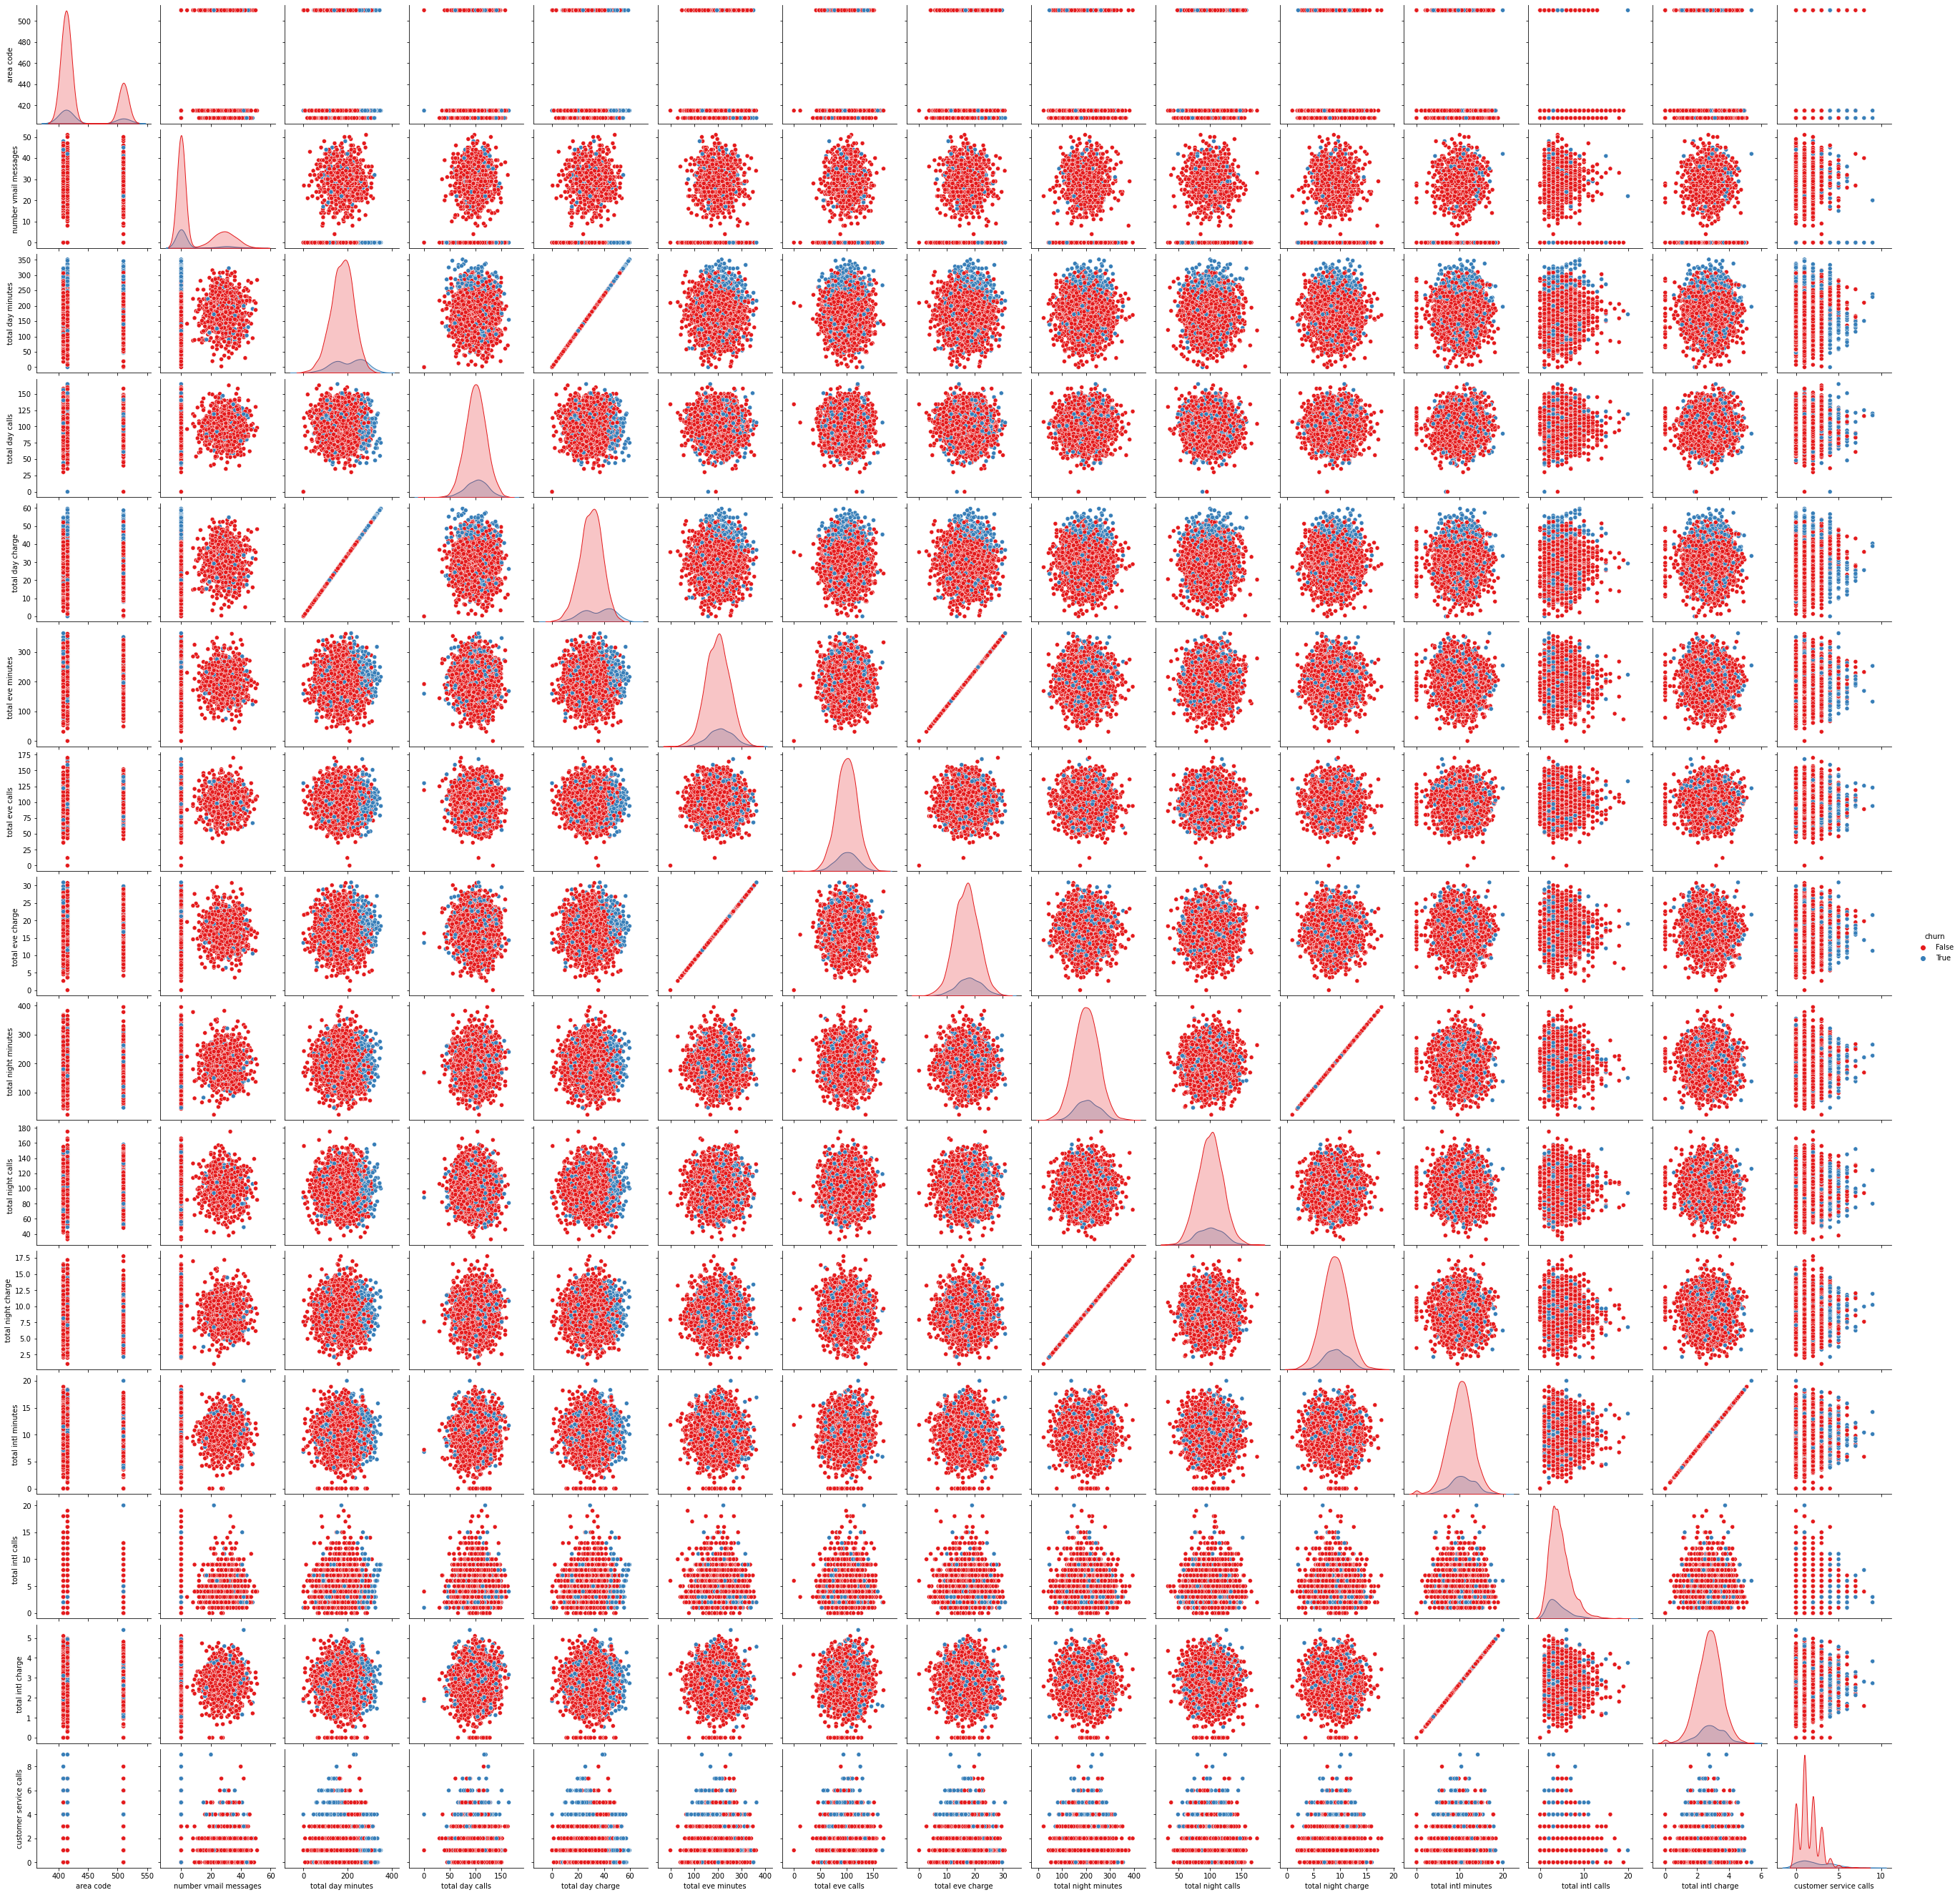

In [41]:

sns.pairplot(st_data_eda, hue='churn', diag_kind='kde', palette='Set1')
plt.show()


### Feature Engineering
Create new features that may help improve the model's performance.
Feature selection: Choose the most relevant features for the model.

## Train-Test Split

Split the dataset into training and testing sets (e.g., 70%-80% for training and 20%-30% for testing).

# Preprocessing 
## feature Scaling:
Standardize or normalize features if necessary, especially if features have different units or scales.

## Data Modeling

Describe and justify the process for analyzing or modeling the data

Model Selection:
Choose Logistic Regression as the model.
Model Training:
Fit the logistic regression model to the training data.
Regularization:
Consider applying regularization (e.g., L1 or L2) to prevent overfitting.

Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?

#### Here you run your code to model the data

## Evaluation
Predictions:

* Use the trained model to make predictions on the test set.
* Performance Metrics:
* Confusion Matrix: Evaluate True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).

* Accuracy: The proportion of correct predictions.

* Precision: The proportion of positive predictions that are actually correct (TP / (TP + FP)).

* Recall (Sensitivity): The proportion of actual positives that are correctly predicted (TP / (TP + FN)).

* F1-Score: The harmonic mean of precision and recall, useful for imbalanced datasets.

* ROC-AUC Score: Evaluate the model's ability to distinguish between classes using the Area Under the ROC Curve.

* Log Loss: A measure of the model's uncertainty in its predictions.



Evaluate how well your work solves the stated business problem

Questions to consider:

* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
   

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps
    

Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?\n
    